In [5]:

import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt



## (a) Generate and Compute Profit

In this section, we generate a vector with values from 0 to 80 and calculate the profit for each value in the vector using the formula:

$$profit = p \times 100,000 - 3,000,000 $$
    

In [6]:

# Generate a vector with values of p from 0 to 80 with a step size of 1
p_values = np.arange(0, 81, 1)
print(f"Length of p_values vector: {len(p_values)}")

# Define a function that applies the formula to each value in the vector
def compute_profit(p_vector):
    return p_vector * 100000 - 3000000

# Compute the result
result = compute_profit(p_values)

# Display the result
print(result)
    

Length of p_values vector: 81
[-3000000 -2900000 -2800000 -2700000 -2600000 -2500000 -2400000 -2300000
 -2200000 -2100000 -2000000 -1900000 -1800000 -1700000 -1600000 -1500000
 -1400000 -1300000 -1200000 -1100000 -1000000  -900000  -800000  -700000
  -600000  -500000  -400000  -300000  -200000  -100000        0   100000
   200000   300000   400000   500000   600000   700000   800000   900000
  1000000  1100000  1200000  1300000  1400000  1500000  1600000  1700000
  1800000  1900000  2000000  2100000  2200000  2300000  2400000  2500000
  2600000  2700000  2800000  2900000  3000000  3100000  3200000  3300000
  3400000  3500000  3600000  3700000  3800000  3900000  4000000  4100000
  4200000  4300000  4400000  4500000  4600000  4700000  4800000  4900000
  5000000]



## (b) Constructing the Transition Matrix

We set up a transition matrix $ T $ where each entry represents the probability of transitioning from state $p_t $ to $p_{t+1}$. The entries are based on a normal distribution with mean 0 and standard deviation 4.
    

In [7]:

# Parameters
states = np.arange(81)  # State values from 0 to 80
num_states = len(states)
mean_u = 0              # Mean of the transition distribution
sd_u = 4                # Standard deviation of the transition distribution

# Transition matrix initialization
T = np.zeros((num_states, num_states))

# Calculate cutoffs for each transition
cutoffs = np.arange(-0.5, num_states, 1)

# Populate the transition matrix
for i in range(num_states):  # Iterate over each row (current state p_t)
    for j in range(num_states):  # Iterate over each column (next state p_t+1)
        if j == 0:
            # For the first state, consider lower bound as -infinity
            lower_bound = -np.inf
        else:
            lower_bound = cutoffs[j]
        
        if j == num_states - 1:
            # For the last state, consider upper bound as infinity
            upper_bound = np.inf
        else:
            upper_bound = cutoffs[j + 1]

        # Calculate the probability of transitioning from state i to state j
        probability = norm.cdf(upper_bound, loc=states[i], scale=sd_u) - norm.cdf(lower_bound, loc=states[i], scale=sd_u)
        T[i, j] = probability

# Verify rows sum to 1 (as each row represents a probability distribution)
row_sums = T.sum(axis=1)

print("Transition Matrix (T):")
print(T)
print("\nRow sums (should be 1):")
print(row_sums)
    

Transition Matrix (T):
[[5.49738225e-01 9.64315418e-02 8.78447043e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.50261775e-01 9.94764497e-02 9.64315418e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.53830233e-01 9.64315418e-02 9.94764497e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.27307599e-84 7.75594078e-82 9.07800780e-80 ... 9.94764497e-02
  9.64315418e-02 3.53830233e-01]
 [4.72885399e-86 6.22578745e-84 7.75594078e-82 ... 9.64315418e-02
  9.94764497e-02 4.50261775e-01]
 [3.34932479e-88 4.69536075e-86 6.22578745e-84 ... 8.78447043e-02
  9.64315418e-02 5.49738225e-01]]

Row sums (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]



## (c) Fixed-Point Iteration for Value Function

Using a discount factor and a utility function, we apply fixed-point iteration to solve for the value function $V(p_t)$ for each state. The decision variable (0 or 1) represents whether it's optimal to continue or stop.
    

In [8]:

# Parameters
num_states = 81  # States from 0 to 80
std_dev = 4  # Standard deviation of the increment u
discount_factor = 1 / 1.05  # Discount factor
states = np.arange(num_states)
utility = states * 100000 - 3000000  # Utility term (p_t * 100000 - 3000000) for each state p_t

# Fixed-point iteration parameters
tolerance = 1e-6
max_iterations = 1000

# Initialize value function (starting with zero for all states)
V = np.zeros(num_states)
decision = np.zeros(num_states, dtype=int)  # To store the decision for each state (0 or 1)

# Fixed-point iteration to solve for V(p_t)
for iteration in range(max_iterations):
    # Create a copy of the current value function to check convergence later
    V_old = V.copy()
    
    # Calculate the option value for each state
    option_value = discount_factor * np.dot(T, V_old)
    
    # Determine V and decision based on max between utility and option value
    V = np.maximum(utility, option_value)
    decision = (V == utility).astype(int)  # 1 if choosing utility, 0 if choosing option value
    
    # Check for convergence
    if np.max(np.abs(V - V_old)) < tolerance:
        break

# Convert the resulting V and decision to a DataFrame for display
df_results = pd.DataFrame({'Value Function V(p_t)': V, 'Decision (0=option, 1=utility)': decision})

# Find the row number where the decision is 1
trigger_price_row = df_results[df_results['Decision (0=option, 1=utility)'] == 1].index[0]
print(f"The trigger price is: {trigger_price_row}")
    

The trigger price is: 41



## (d) Plotting the Value Function

We now visualize the computed value function $V(p_t)$ for each state. The plot helps in understanding the value associated with each state in relation to the price.
    

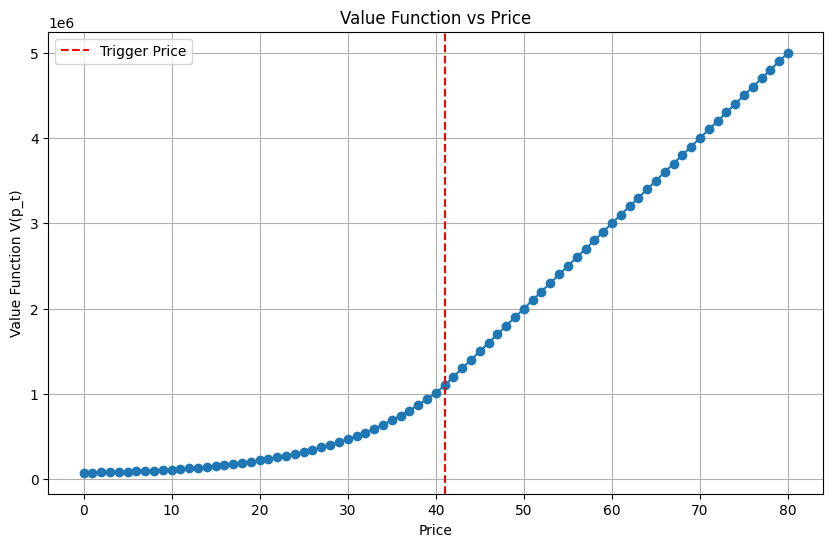

In [11]:
# Plot the Value Function
plt.figure(figsize=(10, 6))
plt.plot(df_results.index, df_results['Value Function V(p_t)'], marker='o', linestyle='-')
plt.axvline(x=41, color='r', linestyle='--', label='Trigger Price')
plt.xlabel('Price')
plt.ylabel('Value Function V(p_t)')
plt.title('Value Function vs Price')
plt.legend()
plt.grid(True)
plt.show()
    

Intuitively, the values before 41 represent option values, which are the discounted future utilities when the price exceeds 41, using the discount factor. Thus, the shape is non-linear. After 41, the values are linear in price because they reflect the current utility, and the current utility (i.e., profit) is linear in price.